# TimeSeries Forecast 
Dataset and problem are provided in online Hackathon by Analytics vidhya at DataHack summit

## Hypothesis 

- There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
- The traffic will be high from May to October.
Explanation - Tourist visits generally increases during this time perion.
- Traffic on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to office on weekdays and hence the traffic will be more
- Traffic during the peak hours will be high.
Explanation - People will travel to work, college

``` These are Hypothesis that made and validated in this notebook for Timeseries Forecast
```

# 1. Data Exploration and Hypothesis Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [9]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1 
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2
    

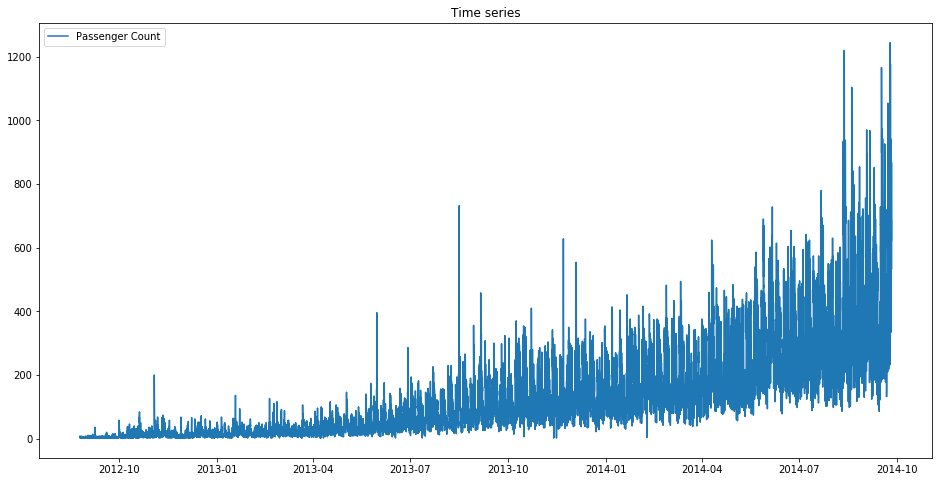

In [11]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label ='Passenger Count')
plt.title('Time series')
plt.xlabel = ('Time(year-month)')
plt.ylabel = ('passenger count')
plt.legend(loc='best')

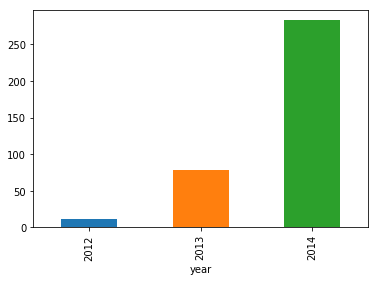

In [12]:
train.groupby('year')['Count'].mean().plot.bar()

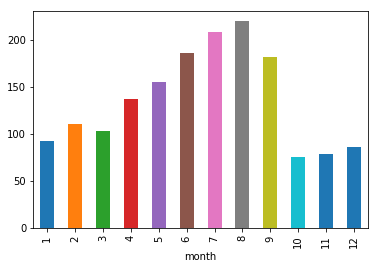

In [13]:
train.groupby('month')['Count'].mean().plot.bar()

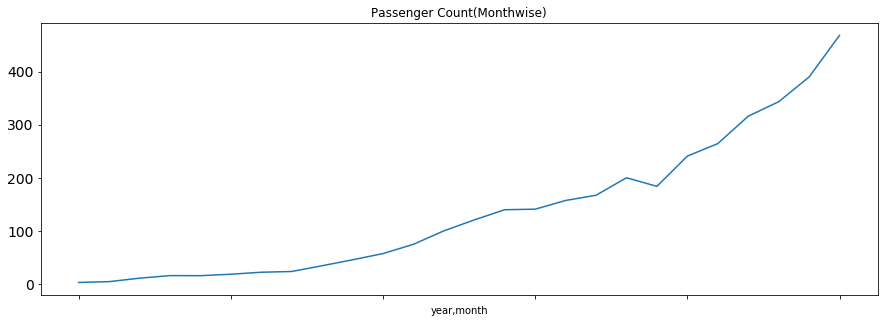

In [14]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title ='Passenger Count(Monthwise)',fontsize = 14)

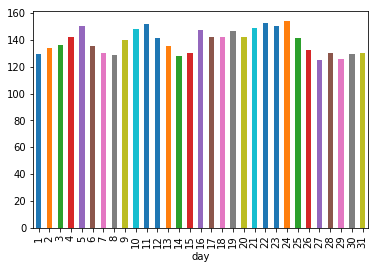

In [15]:
train.groupby('day')['Count'].mean().plot.bar()

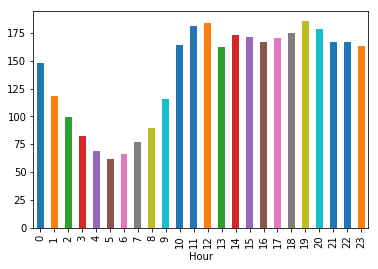

In [16]:
train.groupby('Hour')['Count'].mean().plot.bar()

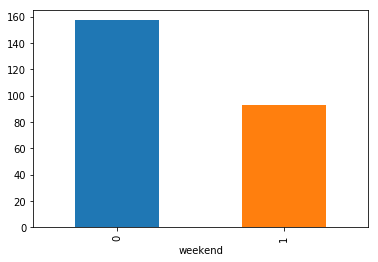

In [17]:
train.groupby('weekend')['Count'].mean().plot.bar()

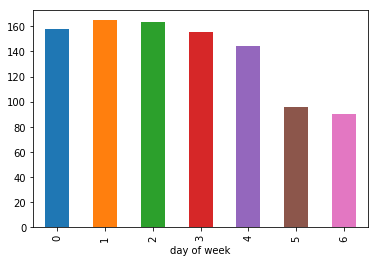

In [18]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [19]:
train=train.drop('ID',1)

# 2. Splitting Data

In [20]:
Train = train.ix['2012-08-25':'2014-06-24']
Valid = train.ix['2014-06-25':'2014-09-25']

TypeError: 'str' object is not callable

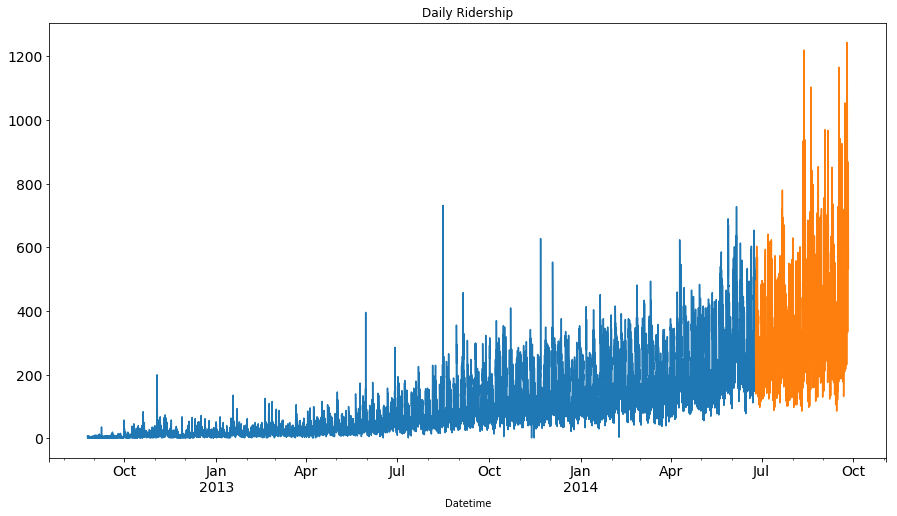

In [21]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# 3. Modeling Techniques

- Naive Approach
- Moving Average
- Simple Exponential Smoothing
- Holt’s Linear Trend Mode

## 1. Naive Approach

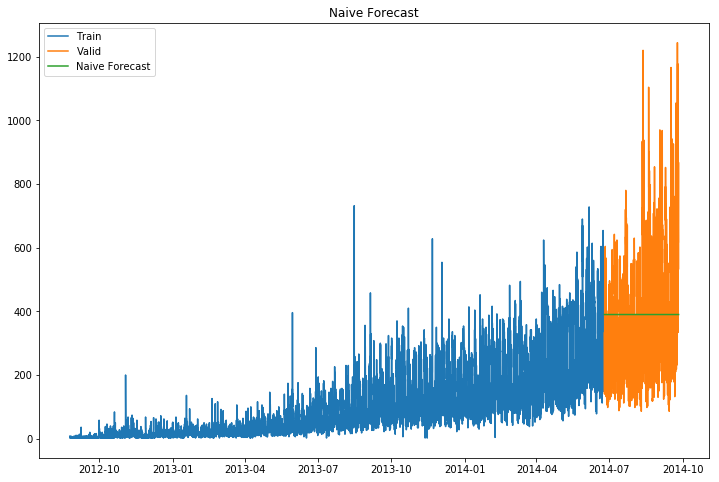

In [22]:
dd = np.asarray(Train.Count)
y_hat = Valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(Valid.index, Valid['Count'], label = 'Valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Valid.Count, y_hat.naive))
print(rms)

186.37368520699056


## 2. Moving Average

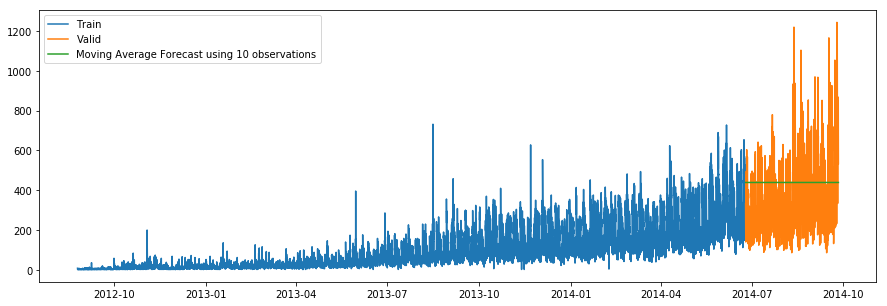

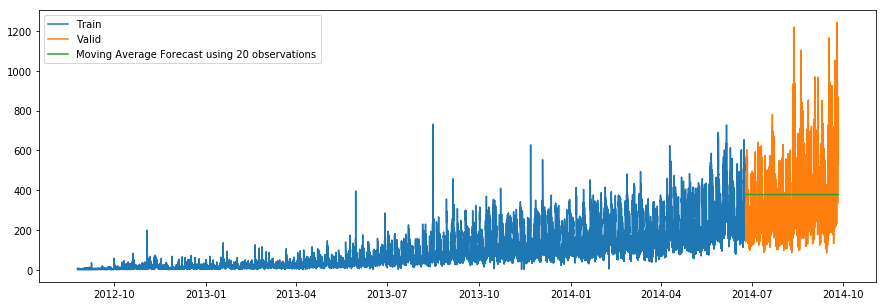

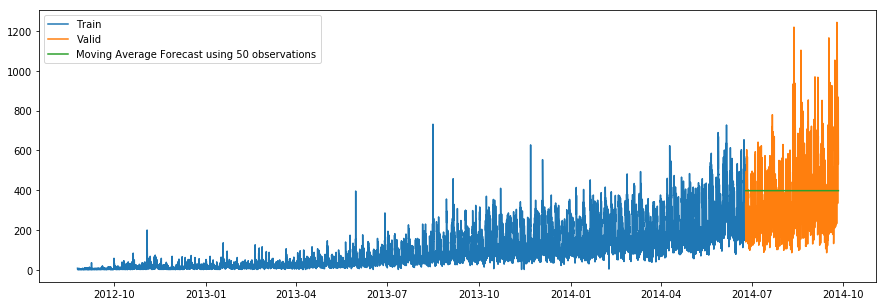

In [24]:
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)


186.5773761711873


## 3. Simple Exponential Hypothesis

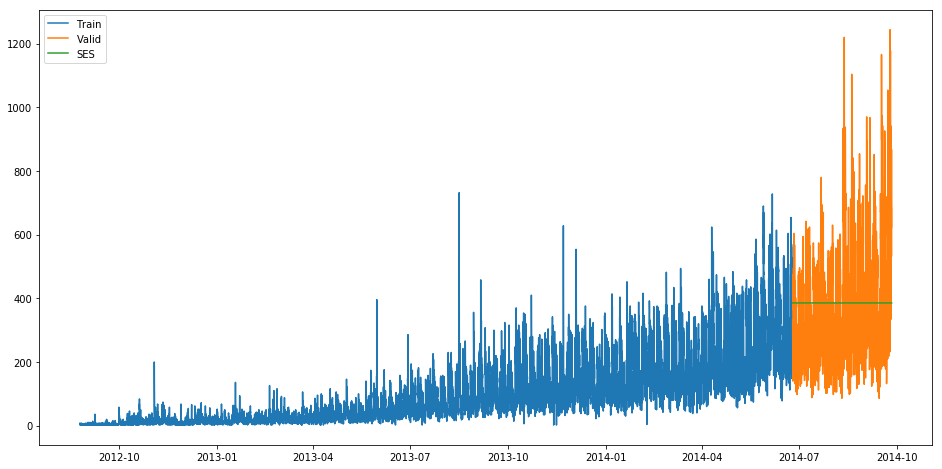

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = Valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6, optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(Valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'],label = 'SES')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.SES))
print(rms)

186.40944652452376


## 4. Holt’s Linear Trend Model

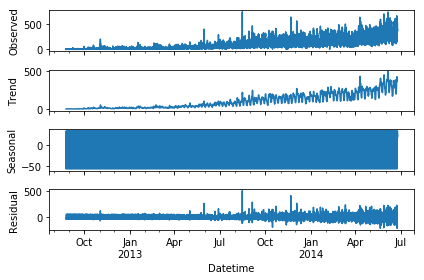

In [28]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)
plt.show()

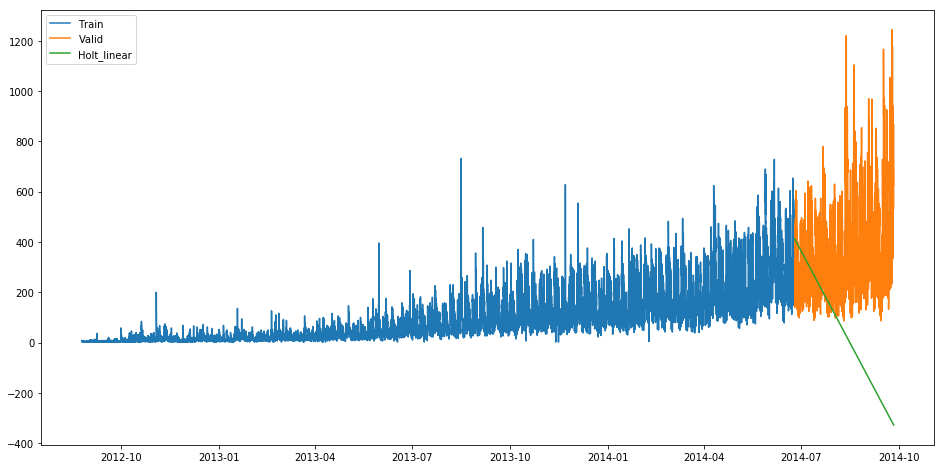

In [29]:
y_hat_avg = Valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(Valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(Valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [30]:
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.Holt_linear))
print(rms)

475.09398202897876


## Holt’s Linear Trend Model on daily time series

In [33]:
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')

In [34]:
predict = fit1.forecast(len(test))

In [35]:
test['prediction'] = predict

In [39]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [40]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')